# Employee Performance Score Classification

In [1]:
# Imports
import pandas as pd # Para el procesamiento de datos

import matplotlib.pyplot as plt # Gráficos
import matplotlib
import seaborn as sns # Gráficos


# Machine Learning
from sklearn.preprocessing import LabelEncoder # Codifica variables categóricas en datos numéricos
from sklearn.model_selection import train_test_split # Divide el dataset (train, test)

from sklearn.preprocessing import StandardScaler # Estandarizamos o Normalizamos los datos
from sklearn.metrics import accuracy_score # Métricas


# Regresión Logística
from sklearn.linear_model import LogisticRegression


# Vecinos más Cercanos
from sklearn.neighbors import KNeighborsClassifier


'''
Ayuda a encontrar los mejores hiperparámetros para un modelo mediante 
la prueba de todas las combinaciones posibles de valores de hiperparámetros 
y la selección de aquellos que proporcionan el mejor rendimiento.
'''
from sklearn.model_selection import GridSearchCV


'''
Permite encadenar múltiples etapas en una secuencia ordenada, 
donde cada paso puede ser una transformación de datos o un 
modelo de aprendizaje automático.
'''
from sklearn.pipeline import Pipeline


# Máquinas de vectores de soporte
from sklearn.svm import SVC


# Random Forest 
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Leemos el DataSet y los almacenamos en una variable
data = pd.read_csv("DataSet.csv")

## Data Analysis

In [3]:
# Visualizamos los datos
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [4]:
# Revisamos las dimensiones del DataSet
print( data.shape[0], ' Filas, ', data.shape[1], ' Columnas ' )

311  Filas,  36  Columnas 


In [5]:
# Miramos que columnas tenemos y cuales nos van a ser utiles
data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [6]:
# Buscamos al empleado con el mayor salario
data.iloc[ data["Salary"].idxmax() ]

Employee_Name                        King, Janet
EmpID                                      10089
MarriedID                                      1
MaritalStatusID                                1
GenderID                                       0
EmpStatusID                                    1
DeptID                                         2
PerfScoreID                                    3
FromDiversityJobFairID                         0
Salary                                    250000
Termd                                          0
PositionID                                    16
Position                         President & CEO
State                                         MA
Zip                                         1902
DOB                                     09/21/54
Sex                                            F
MaritalDesc                              Married
CitizenDesc                           US Citizen
HispanicLatino                               Yes
RaceDesc            

In [7]:
# Buscamos al empleado con el menor salario
data.iloc[ data["Salary"].idxmin() ]

Employee_Name                           Zima, Colleen
EmpID                                           10271
MarriedID                                           0
MaritalStatusID                                     4
GenderID                                            0
EmpStatusID                                         1
DeptID                                              5
PerfScoreID                                         3
FromDiversityJobFairID                              0
Salary                                          45046
Termd                                               0
PositionID                                         19
Position                      Production Technician I
State                                              MA
Zip                                              1730
DOB                                          08/17/78
Sex                                                 F
MaritalDesc                                   Widowed
CitizenDesc                 

In [8]:
# Buscamos al empleado con el mayor número de faltas
data.iloc[ data["Absences"].idxmax() ]

Employee_Name                           Bates, Norman
EmpID                                           10061
MarriedID                                           0
MaritalStatusID                                     0
GenderID                                            1
EmpStatusID                                         4
DeptID                                              5
PerfScoreID                                         3
FromDiversityJobFairID                              0
Salary                                          57834
Termd                                               1
PositionID                                         19
Position                      Production Technician I
State                                              MA
Zip                                              2050
DOB                                          10/18/81
Sex                                                M 
MaritalDesc                                    Single
CitizenDesc                 

In [9]:
# Buscamos al empleado con el menor número de faltas
data.iloc[ data["Absences"].idxmin() ]

Employee_Name                     Adinolfi, Wilson  K
EmpID                                           10026
MarriedID                                           0
MaritalStatusID                                     0
GenderID                                            1
EmpStatusID                                         1
DeptID                                              5
PerfScoreID                                         4
FromDiversityJobFairID                              0
Salary                                          62506
Termd                                               0
PositionID                                         19
Position                      Production Technician I
State                                              MA
Zip                                              1960
DOB                                          07/10/83
Sex                                                M 
MaritalDesc                                    Single
CitizenDesc                 

In [10]:
# Buscamos al empleado con el mayor número de Retrasos
data.iloc[ data["DaysLateLast30"].idxmax() ]

Employee_Name                      Delarge, Alex
EmpID                                      10306
MarriedID                                      0
MaritalStatusID                                0
GenderID                                       1
EmpStatusID                                    1
DeptID                                         6
PerfScoreID                                    1
FromDiversityJobFairID                         0
Salary                                     61568
Termd                                          0
PositionID                                     3
Position                      Area Sales Manager
State                                         AL
Zip                                        36006
DOB                                     11/02/75
Sex                                           M 
MaritalDesc                               Single
CitizenDesc                           US Citizen
HispanicLatino                                No
RaceDesc            

In [11]:
# Buscamos al empleado con el menor número de Retrasos
data.iloc[ data["DaysLateLast30"].idxmin() ]

Employee_Name                     Adinolfi, Wilson  K
EmpID                                           10026
MarriedID                                           0
MaritalStatusID                                     0
GenderID                                            1
EmpStatusID                                         1
DeptID                                              5
PerfScoreID                                         4
FromDiversityJobFairID                              0
Salary                                          62506
Termd                                               0
PositionID                                         19
Position                      Production Technician I
State                                              MA
Zip                                              1960
DOB                                          07/10/83
Sex                                                M 
MaritalDesc                                    Single
CitizenDesc                 

In [12]:
# Queremos conocer las posiciones y el número de esos empleados.
data["Position"].value_counts().sort_values( ascending=False )


Production Technician I         137
Production Technician II         57
Area Sales Manager               27
Production Manager               14
Software Engineer                10
IT Support                        8
Data Analyst                      7
Sr. Network Engineer              5
Database Administrator            5
Network Engineer                  5
BI Developer                      4
Senior BI Developer               3
Administrative Assistant          3
Sales Manager                     3
Accountant I                      3
Sr. Accountant                    2
IT Manager - DB                   2
Sr. DBA                           2
Director of Operations            1
Shared Services Manager           1
Data Analyst                      1
Data Architect                    1
Principal Data Architect          1
IT Manager - Infra                1
President & CEO                   1
Enterprise Architect              1
BI Director                       1
Director of Sales           

### Gráficos de barras

* Distribución de sexo

In [13]:
# Veamos las distribución de sexo en nuestros empleados
data["Sex"].value_counts()
# Podemos observar que hay más 176 mujeres y 135 Hombres

F     176
M     135
Name: Sex, dtype: int64

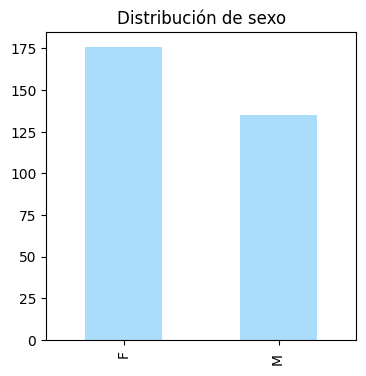

In [14]:
# Graficamos la distribución de Hombres y Mujeres
sexo = data["Sex"].value_counts()
sexo.plot(  kind="bar", 
            title="Distribución de sexo",
            figsize= (4, 4),
            color="#87CEFA",
            alpha=0.70 )
plt.show()

* Distribución de empleados por sus posiciones 

<AxesSubplot:title={'center':'Distribución de empleados por sus posiciones '}>

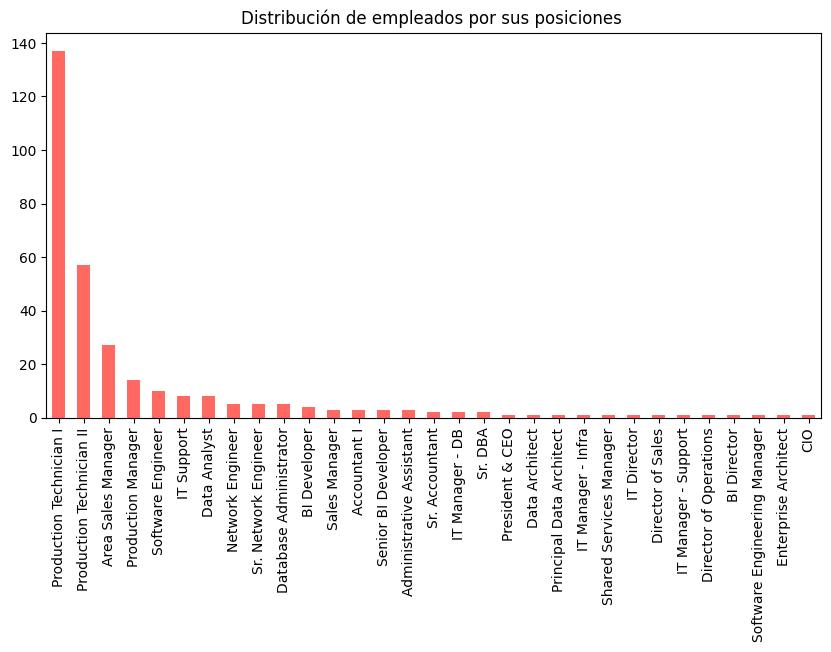

In [15]:
# Graficamos la distribución los empleados por sus posiciones

# Quitamos los valores vacios antes de contar las Posiciones caso contrario se  repetiria DataAnalyst
empleadoDepartamento = data["Position"].str.strip().value_counts()
empleadoDepartamento.plot( 
                            kind="bar",
                            title="Distribución de empleados por sus posiciones ",
                            figsize=(10, 5),
                            color="#ff6961"
                        )

In [16]:
# Con valores repetidos
(data["Position"].unique())

# Si valores repetidos
#(data["Position"].str.strip().unique())

array(['Production Technician I', 'Sr. DBA', 'Production Technician II',
       'Software Engineer', 'IT Support', 'Data Analyst',
       'Database Administrator', 'Enterprise Architect', 'Sr. Accountant',
       'Production Manager', 'Accountant I', 'Area Sales Manager',
       'Software Engineering Manager', 'BI Director',
       'Director of Operations', 'Sr. Network Engineer', 'Sales Manager',
       'BI Developer', 'IT Manager - Support', 'Network Engineer',
       'IT Director', 'Director of Sales', 'Administrative Assistant',
       'President & CEO', 'Senior BI Developer',
       'Shared Services Manager', 'IT Manager - Infra',
       'Principal Data Architect', 'Data Architect', 'IT Manager - DB',
       'Data Analyst ', 'CIO'], dtype=object)

* Distribución de Etnias

<AxesSubplot:title={'center':'Distribución de Etnias'}>

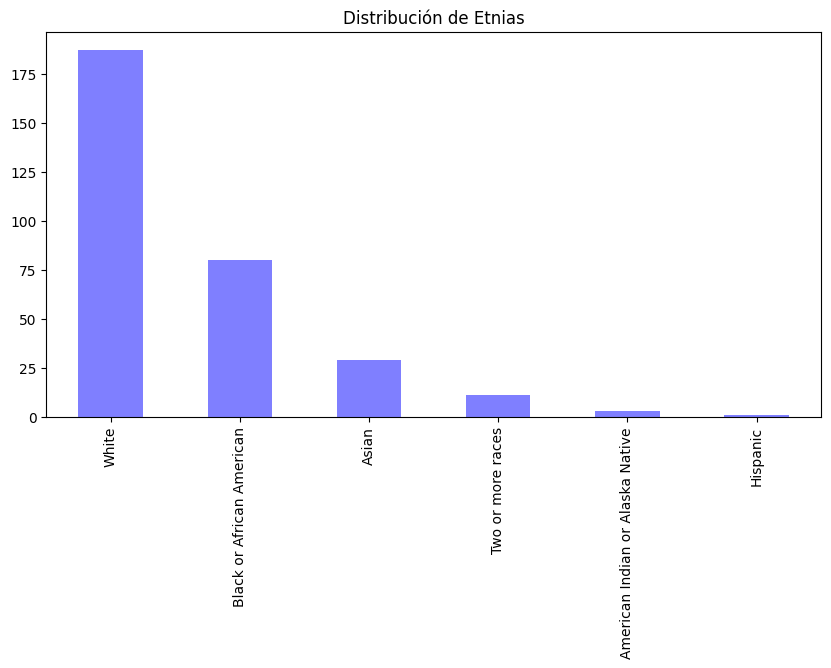

In [17]:
# Gráficamos la distribución de Etnias de los empleados
etnia = data["RaceDesc"].value_counts()
etnia.plot( 
            kind="bar",
            title="Distribución de Etnias",
            figsize=(10, 5),
            color="Blue",
            alpha=0.5
            )

### Gráficos Circulares

* Fuentes de reclutamiento

In [18]:
# Contemos las fuentes de reclutamiento
data["RecruitmentSource"].value_counts()

Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: RecruitmentSource, dtype: int64

<AxesSubplot:title={'center':'Fuentes de Reclutamiento'}, ylabel='RecruitmentSource'>

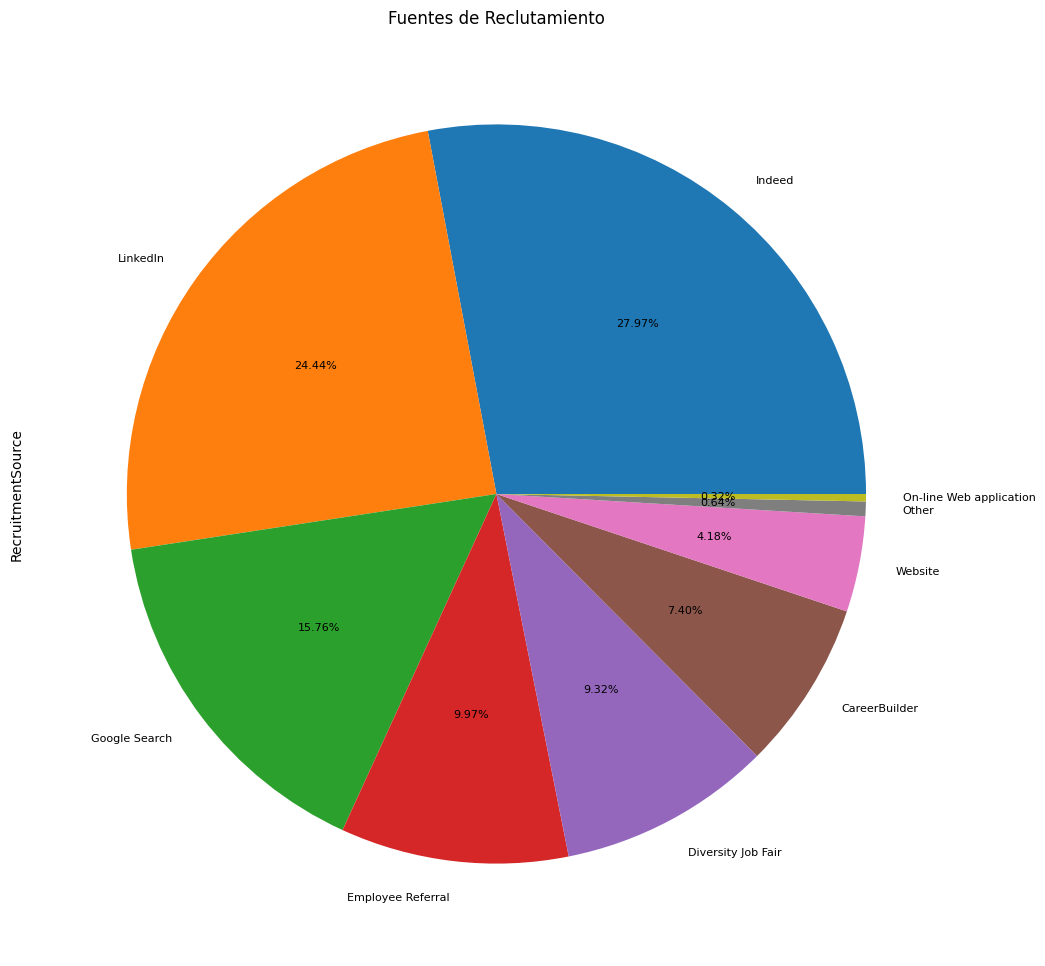

In [19]:
# Graficamos la distribución de las fuentes de reclutamiento

fuentesValores = data["RecruitmentSource"].value_counts()

fuentesValores.plot(
                    kind="pie",
                    title="Fuentes de Reclutamiento",
                    autopct='%1.2f%%', 
                    figsize=(18, 12),
                    fontsize=8
                    )

* Evaluación del rendimiento

<AxesSubplot:title={'center':'Evaluación del rendimiento'}, ylabel='PerformanceScore'>

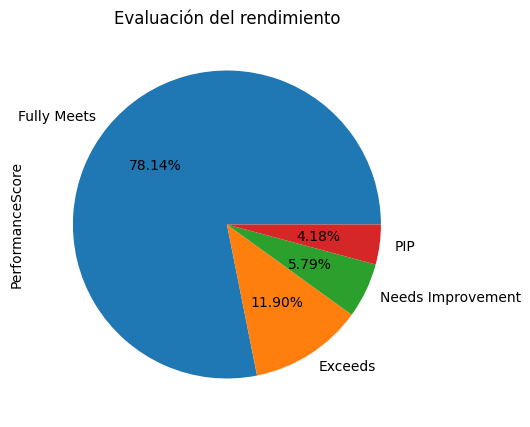

In [20]:
# Graficamos la evaluación del rendimiento
evaRendimiento = data["PerformanceScore"].value_counts()

evaRendimiento.plot( 
                    kind="pie",
                    title="Evaluación del rendimiento",
                    autopct='%1.2f%%', 
                    figsize=(5, 5)
                    )

* Distribución de los empleados por departamento

<AxesSubplot:title={'center':'Distribución de los empleados por departamento'}, ylabel='Department'>

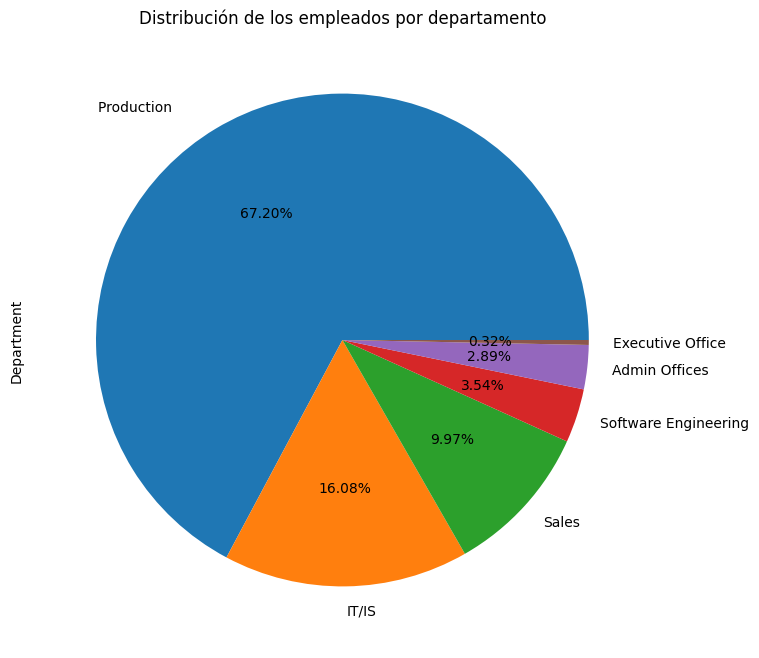

In [21]:
departamento = data["Department"].value_counts()
departamento.plot( 
                kind="pie",
                title="Distribución de los empleados por departamento",
                autopct='%1.2f%%', 
                figsize=(8,8)
                )

In [22]:
departamento

Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: Department, dtype: int64

## Ingeniería de Características

In [23]:
data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

### Conservamos las columnas: Sex, Department, RaceDesc, Salary, PerformanceScore.

In [24]:
# Nuevo DataFrame
df = data[ ["Sex", "Department", "RaceDesc", "Salary", "PerformanceScore"] ]

In [25]:
# Visualizamos nuestro data set
df.head()

,Sex,Department,RaceDesc,Salary,PerformanceScore
0,M,Production,White,62506,Exceeds
1,M,IT/IS,White,104437,Fully Meets
2,F,Production,White,64955,Fully Meets
3,F,Production,White,64991,Fully Meets
4,F,Production,White,50825,Fully Meets


### Buscamos valores repetidos, null, outlier, etc (limpiamos el dataset)

In [26]:
df.isnull().sum()

Sex                 0
Department          0
RaceDesc            0
Salary              0
PerformanceScore    0
dtype: int64

In [27]:
df.isna().sum()

Sex                 0
Department          0
RaceDesc            0
Salary              0
PerformanceScore    0
dtype: int64

In [28]:
df.duplicated().sum()

0

### Analizamos nuestro dataset

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sex               311 non-null    object
 1   Department        311 non-null    object
 2   RaceDesc          311 non-null    object
 3   Salary            311 non-null    int64 
 4   PerformanceScore  311 non-null    object
dtypes: int64(1), object(4)
memory usage: 12.3+ KB


In [30]:
# Resumen estadístico del Salario
df["Salary"].describe()

count       311.000000
mean      69020.684887
std       25156.636930
min       45046.000000
25%       55501.500000
50%       62810.000000
75%       72036.000000
max      250000.000000
Name: Salary, dtype: float64

## Entrenamos nuestro modelo

### Codificamos las variables categóricas de Sex, Department, RaceDesc & PerformanceScore en datos numéricos

In [31]:
# Sin codificar
df.head()

,Sex,Department,RaceDesc,Salary,PerformanceScore
0,M,Production,White,62506,Exceeds
1,M,IT/IS,White,104437,Fully Meets
2,F,Production,White,64955,Fully Meets
3,F,Production,White,64991,Fully Meets
4,F,Production,White,50825,Fully Meets


In [32]:
# creamos una instancia del objeto `LabelEncoder`
labelencoder = LabelEncoder()

In [33]:
df["PerformanceScore"] = labelencoder.fit_transform( df["PerformanceScore"] )
df["Sex"] = labelencoder.fit_transform( df["Sex"] )
df["Department"] = labelencoder.fit_transform( df["Department"] )
df["RaceDesc"] = labelencoder.fit_transform( data["RaceDesc"] )

C:\Users\usuario\AppData\Local\Temp\ipykernel_15976\1554100150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PerformanceScore"] = labelencoder.fit_transform( df["PerformanceScore"] )
C:\Users\usuario\AppData\Local\Temp\ipykernel_15976\1554100150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex"] = labelencoder.fit_transform( df["Sex"] )
C:\Users\usuario\AppData\Local\Temp\ipykernel_15976\1554100150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [34]:
# Codificado
df.head()

,Sex,Department,RaceDesc,Salary,PerformanceScore
0,1,3,5,62506,0
1,1,2,5,104437,1
2,0,3,5,64955,1
3,0,3,5,64991,1
4,0,3,5,50825,1


### Veamos como se correlacionan nuestros datos con 'PerformanceScore'

Si nuestros datos tienen una fuerte correlación (positiva o negativa), los modelos de aprendizaje automático pueden hacer predicciones más precisas en general para alguno modelos, pero esto no es una regla estricta , para algunos modelos, la presencia de correlaciones fuertes entre variables puede conducir a proble. El coeficiente de correlación es una medida que indica cuán fuerte es la relación entre dos variables, y puede variar de -1 (correlación negativa perfecta) a 1 (correlación positiva perfecta).

In [35]:
'''
Calculamos la correlación de todas las columnas del DataFrame df 
con respecto a la columna "PerformanceScore"
'''

df.corr()["PerformanceScore"].sort_values( ascending=True )

Salary             -0.125138
RaceDesc            0.005621
Sex                 0.054915
Department          0.057614
PerformanceScore    1.000000
Name: PerformanceScore, dtype: float64

### Representación visual con mapas de calor

<AxesSubplot:>

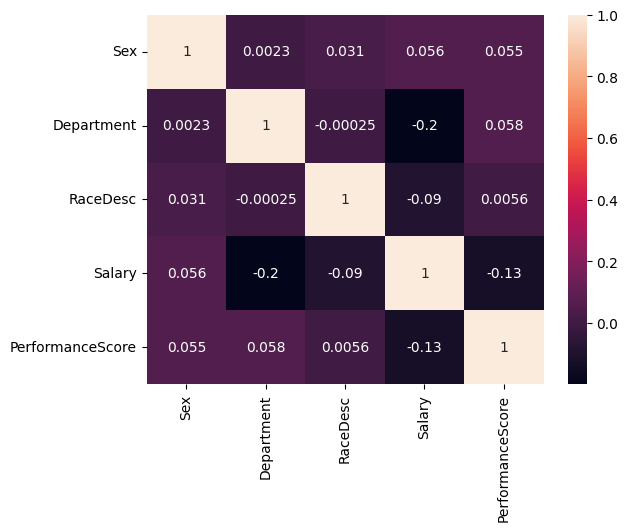

In [36]:
''' 
Los colores más cálidos(1) indican una correlación positiva alta, 
mientras que los colores más fríos(-1) indican una correlación negativa.
''' 

sns.heatmap( data=df.corr(), annot=True )

In [37]:
df.columns

Index(['Sex', 'Department', 'RaceDesc', 'Salary', 'PerformanceScore'], dtype='object')

### Preparación

In [38]:
# Definimos  X  y
X = df[ ['Sex', 'Department', 'RaceDesc', 'Salary'] ]
y = df[ 'PerformanceScore' ]

In [39]:
# Dividimos el dataset en el conjunto de pruebas y de entrenamiento
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size=0.3 )

In [40]:
# Creamos una instancia del objeto StandardScaler
scaler = StandardScaler()

# Utilizamos el objeto scaler para normalizar los datos de entrenamiento X_train 
scaled_X_train = scaler.fit_transform(X_train) # aplicamos la normalización

# Utilizamos el objeto scaler para normalizar los datos de prueba X_test
scaled_X_test = scaler.fit_transform(X_test) # aplicamos la normalización

### Métrica para calcular la precisión de un modelo

In [41]:
# Función para calcular la precisión de un modelo
def modelresults(predictions):
    print(f"Acurracy score of the model is {accuracy_score(y_test, predictions)}")

### Aprendizaje Supervisado - Regresión Logística

Aprendizaje supervisado que se utiliza para la clasificación binaria o 
la predicción de probabilidades

In [42]:
log_model = LogisticRegression()
log_model.fit( scaled_X_train, y_train ) # Entrenamos el módelo con los datos de entrenamiento
log_predictions = log_model.predict( scaled_X_test ) # Probamos el módelo con los datos de prueba

In [43]:
modelresults( log_predictions )

Acurracy score of the model is 0.8297872340425532


### Aprendizaje Supervisado - Vecinos Más Cercanos

Aprendizaje supervisado que se utiliza para clasificación en base a los 
vecinos más cercanos de cada muestra de datos

In [44]:
# Creamos un clasificador K-NN vacío.
knn = KNeighborsClassifier() 
# Definimos una lista de valores de vecinos K que queremos probar.
k_values = list( range(1, 30) ) 
# Creamos un pipeline con el clasificador KNN como único paso
pipe = Pipeline( steps = [("knn", knn)] ) 

# Definimos la cuadrícula de parámetros que GridSearchCV probará
# Aquí estamos ajustando el parámetro "n_neighbors" del clasificador KNN
param_grid = {"knn__n_neighbors": k_values}

# Creamos un objeto GridSearchCV para ajustar el modelo y seleccionar los mejores parámetros
# Utilizamos validación cruzada con 5 pliegues y medimos la precisión como métrica de evaluación
cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy")

# Ajustamos el modelo con los datos de entrenamiento escalados y la variable objetivo
print( cv_classifier.fit(scaled_X_train, y_train) )

GridSearchCV(cv=5, estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')


In [45]:
# k valor de mayor rendimiento
print( cv_classifier.best_params_ )

{'knn__n_neighbors': 8}


In [46]:
pred_gridknn = cv_classifier.predict( scaled_X_test )

In [47]:
modelresults( pred_gridknn )

Acurracy score of the model is 0.8085106382978723


### Aprendizaje Supervisado - Máquinas de vectores de soporte

Es un algoritmo de aprendizaje supervisado que se utiliza principalmente para problemas de clasificación.

In [48]:
# Creamos una instancia del modelo SVM
svm = SVC()

# Definimos una grilla de parámetros para ajustar hiperparámetros usando GridSearchCV
param_grid_svr = {  
                    "C":[0.01, 0.1, 0.5, 1],  # Rango de valores del parámetro de regularización
                    "kernel":["linear", "rbf", "poly"]  # Funciones kernel para el SVM
                }

# Creamos una instancia de GridSearchCV y le pasamos el modelo, la grilla de parámetros y la cantidad de folds para la validación cruzada
gridsvr = GridSearchCV( svm, param_grid_svr )

In [49]:
# Ajustamos el modelo con los datos de entrenamiento escalados
gridsvr.fit( scaled_X_train, y_train )
pred_svr = gridsvr.predict( scaled_X_test )

In [50]:
modelresults( pred_svr )

Acurracy score of the model is 0.8297872340425532


### Aprendizaje Supervisado - Random Forest

Algoritmo de aprendizaje supervisado utilizado para problemas de clasificación y regresión. En términos generales, se basa en la creación de múltiples árboles de decisión, en los cuales cada uno utiliza una muestra aleatoria de datos y un subconjunto aleatorio de características, lo que se conoce como "bosque". Luego, para la clasificación, el algoritmo toma la predicción de cada árbol y emite la clase más común como resultado final, mientras que para la regresión, se toma la media de todas las predicciones. El Random Forest es conocido por su capacidad para manejar grandes conjuntos de datos, manejar características irrelevantes o redundantes y reducir el sobreajuste.

In [51]:
# Creamos una instancia de RandomForestClassifier
rfr_model = RandomForestClassifier()

# Especificamos los valores posibles que queremos explorar en el hiperparámetro 

# n_estimators, Indica la cantidad de árboles a incluir en el modelo
n_estimators = [32, 64, 128, 256]

# max_features, Indica la cantidad de características a considerar en cada división de un nodo en un árbol
max_features = [2, 3, 4]

# bootstrap, Indica si se debe utilizar bootstrapping para construir los árboles
bootstrap = [ True, False ]

# oob_score, Indica si se debe calcular el score utilizando instancias que no fueron seleccionadas en el proceso de bootstrapping
oob_score = [ True, False ]

# Especificamos un diccionario que contiene todos los posibles valores de los hiperparámetros que queremos explorar
param_grid_rfr = { 
                    "n_estimators": n_estimators, 
                    "max_features": max_features, 
                    "bootstrap":  bootstrap, 
                    "oob_score": oob_score
                }

In [52]:
# Creamos una instancia de GridSearchCV para buscar los mejores hiperparámetros para nuestro modelo
gridrfr = GridSearchCV( rfr_model, param_grid_rfr )

# Entrenamos el modelo usando GridSearchCV
gridrfr.fit( scaled_X_train, y_train )

c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation on

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256],
                         'oob_score': [True, False]})

In [53]:
# Imprimimos los mejores hiperparámetros encontrados
print( gridrfr.best_params_ )

{'bootstrap': True, 'max_features': 3, 'n_estimators': 32, 'oob_score': True}


In [58]:
# Creamos una instancia de RandomForestClassifier usando los mejores hiperparámetros encontrados
rfc = RandomForestClassifier( max_features=3, n_estimators=32, oob_score=True, bootstrap=True )

# Entrenamos el modelo
rfc.fit( scaled_X_train, y_train )

# Realizamos predicciones sobre el conjunto de datos de prueba
predsrfc = rfc.predict( scaled_X_test )

In [59]:
# Evaluamos al modelo
modelresults( predsrfc )

Acurracy score of the model is 0.6808510638297872


In [61]:
# Creamos un arreglo de numpy con los datos de un nuevo empleado para predecir su clasificación
import numpy as np
new_employee = np.array( [1, 3, 5, 100000] )

In [62]:
print( "La predicción de la evaluación del desempeño del empleado a partir del modo logistic es {}".format(log_model.predict(new_employee.reshape(1, -1))))
modelresults( log_predictions )
print()

print( "La predicción de la evaluación del desempeño del empleado a partir del modo knn es {}".format(cv_classifier.predict(new_employee.reshape(1, -1))))
modelresults( pred_gridknn )
print()

print( "La predicción de la evaluación del desempeño del empleado a partir del modo svm es {}".format(gridsvr.predict(new_employee.reshape(1, -1))))
modelresults( pred_svr )
print()

print( "La predicción de la evaluación del desempeño del empleado a partir del modo rfr es {}".format(gridrfr.predict(new_employee.reshape(1, -1))))
modelresults( predsrfc )
print()


La predicción de la evaluación del desempeño del empleado a partir del modo logistic es [0]
Acurracy score of the model is 0.8297872340425532

La predicción de la evaluación del desempeño del empleado a partir del modo knn es [1]
Acurracy score of the model is 0.8085106382978723

La predicción de la evaluación del desempeño del empleado a partir del modo svm es [2]
Acurracy score of the model is 0.8297872340425532

La predicción de la evaluación del desempeño del empleado a partir del modo rfr es [0]
Acurracy score of the model is 0.6808510638297872

